In [8]:
import pandas as pd
import matplotlib as plt
import seaborn as sns 

#loading the dataset
bankdata = pd.read_csv('/Users/donaldokorejior/Desktop/Dataprojects/data/bank_transactions_data_2.csv')


The following lines of code/section will be used to provide a basic overview of the dataset:

In [11]:
bankdata.shape

(2512, 16)

In [13]:
bankdata.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [15]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

We can see the dataset is comprised of 2512 rows and 16 columns. These columns are as follows:

- TransactionID: Unique alphanumeric identifier for each transaction.
- AccountID: Unique identifier for each account, with multiple transactions per account.
- TransactionAmount: Monetary value of each transaction, ranging from small everyday expenses to larger purchases.
- TransactionDate: Timestamp of each transaction, capturing date and time.
- TransactionType: Categorical field indicating 'Credit' or 'Debit' transactions.
- Location: Geographic location of the transaction, represented by U.S. city names.
- DeviceID: Alphanumeric identifier for devices used to perform the transaction.
- P Address: IPv4 address associated with the transaction, with occasional changes for some accounts.
- MerchantID: Unique identifier for merchants, showing preferred and outlier merchants for each account.
- AccountBalance: Balance in the account post-transaction, with logical correlations based on transaction type and amount.
- PreviousTransactionDate: Timestamp of the last transaction for the account, aiding in calculating transaction frequency.
- Channel: Channel through which the transaction was performed (e.g., Online, ATM, Branch).
- CustomerAge: Age of the account holder, with logical groupings based on occupation.
- CustomerOccupation: Occupation of the account holder (e.g., Doctor, Engineer, Student, Retired), reflecting income patterns.
- TransactionDuration: Duration of the transaction in seconds, varying by transaction type.
- LoginAttempts: Number of login attempts before the transaction, with higher values indicating potential anomalies.

Looking at the descriptive statistics the mean values and standard deviations for transactionAmount and AccountBalance shows a huge spread of values around the mean Transaction amounts and Account balances. This perhaps points to abnormal activty amongts transactions within this dataset that will be worth investigating.



In [18]:
bankdata.nunique() #show number of unique values in each row 

TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64

In [20]:
bankdata.describe()


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [22]:
bankdata[['TransactionAmount','CustomerAge','TransactionDuration','LoginAttempts','AccountBalance']].corr()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.025616,0.004359,-0.008445,-0.025165
CustomerAge,-0.025616,1.000000,-0.017936,0.007653,0.319942
TransactionDuration,0.004359,-0.017936,1.000000,0.032639,0.005577
LoginAttempts,-0.008445,0.007653,0.032639,1.000000,0.014999
AccountBalance,-0.025165,0.319942,0.005577,0.014999,1.000000


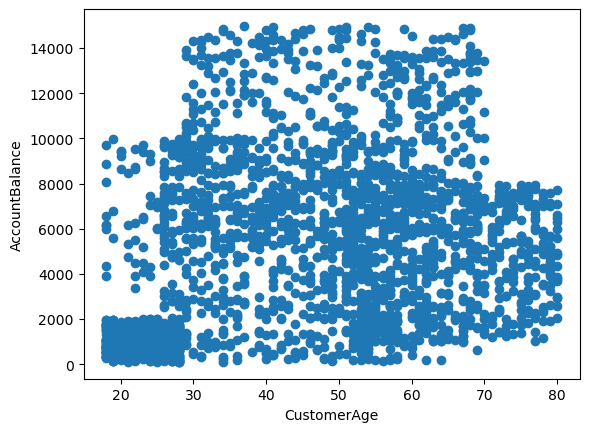

In [24]:
import matplotlib.pyplot as plt
plt.scatter(bankdata['CustomerAge'], bankdata['AccountBalance'])
plt.xlabel('CustomerAge')
plt.ylabel('AccountBalance')
plt.show()

From the above, we can see from 2512 trasactions that took palce there were 495 accounts. Transactions took place across 43 different locations and seemed to occur within 3 unique hours of they day. A quick check for any possible relationships or correlations shows strongest correlation between customer age and their account balance. Focusing on TransactionAmount, Transatction duration and Login attempts a few things points can be made:
 - TransactionAmount having a large standard deviation (291.95) can be understood due to transaction amounts tending to vary largely. The interquartile range will give a more concise indication of spread for these amounts and therefore allows potential outliers to be identified.
 - The standard deviation for Login attempts is very small (0.62), and that can be understood as we would not expect a massive variance of login attempts from the mean value of 1.
 - The standard deviation for TransactionDuration is a worry, as you would not expect such a large spread of time taken to login. Because standard deviations are more infleunced by outliers, their indications of spread can be skewed. especially with unsymmetrical data like TransactionDuration. Like Transaction Amount, the interquartile range will be a better measuere.

In [27]:
def Outliers(column):
    Q1 = bankdata[column].quantile(0.25)
    Q3 = bankdata[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = bankdata[(bankdata[column] < Q1 - 1.5 * IQR) | (bankdata[column] > Q3 + 1.5 * IQR)]
    return outliers 

amountOutliers = Outliers('TransactionAmount')
durationOutliers = Outliers('TransactionDuration')
loginOutliers = Outliers('LoginAttempts')

print(amountOutliers.shape)
print(durationOutliers.shape)
print(loginOutliers.shape)




(113, 16)
(0, 16)
(122, 16)


In [29]:
print(amountOutliers)

     TransactionID AccountID  TransactionAmount      TransactionDate  \
74        TX000075   AC00265            1212.51  2023-10-04 16:36:29   
82        TX000083   AC00236             922.55  2023-01-23 16:32:48   
85        TX000086   AC00098            1340.19  2023-09-29 17:22:10   
110       TX000111   AC00068            1045.22  2023-11-22 16:13:39   
129       TX000130   AC00320            1036.66  2023-07-11 16:39:53   
...            ...       ...                ...                  ...   
2401      TX002402   AC00073             953.17  2023-10-12 17:39:08   
2403      TX002404   AC00111            1493.00  2023-06-07 17:05:41   
2414      TX002415   AC00028            1664.33  2023-09-25 17:11:19   
2428      TX002429   AC00303             981.90  2023-11-28 16:17:46   
2436      TX002437   AC00046             942.70  2023-11-06 16:24:45   

     TransactionType          Location DeviceID       IP Address MerchantID  \
74             Debit      Indianapolis  D000231     193.

In [31]:
print(durationOutliers)

Empty DataFrame
Columns: [TransactionID, AccountID, TransactionAmount, TransactionDate, TransactionType, Location, DeviceID, IP Address, MerchantID, Channel, CustomerAge, CustomerOccupation, TransactionDuration, LoginAttempts, AccountBalance, PreviousTransactionDate]
Index: []


In [33]:
print(loginOutliers)

     TransactionID AccountID  TransactionAmount      TransactionDate  \
23        TX000024   AC00453             345.84  2023-05-02 18:25:46   
26        TX000027   AC00441             246.93  2023-04-17 16:37:01   
32        TX000033   AC00060             396.45  2023-09-25 16:26:00   
38        TX000039   AC00478             795.31  2023-10-12 17:07:40   
61        TX000062   AC00002             263.99  2023-05-16 16:07:30   
...            ...       ...                ...                  ...   
2423      TX002424   AC00340             332.06  2023-06-21 16:38:54   
2445      TX002446   AC00439             403.01  2023-09-04 17:32:35   
2455      TX002456   AC00043             655.81  2023-05-05 16:52:44   
2457      TX002458   AC00315              79.92  2023-02-06 17:32:11   
2492      TX002493   AC00057             267.48  2023-01-30 17:05:46   

     TransactionType     Location DeviceID      IP Address MerchantID Channel  \
23             Debit   Fort Worth  D000162  191.82.103

There were no outliers found for Login attempts. This can be understood because from a mean and minimum value of one, the maximum number of attempts is 5. There is not enough variance/spread for there to be identifiable outliers. Would be better to look at transactions that had login attempts greater than 2.

In [36]:
loginsAbove2 = bankdata[bankdata['LoginAttempts'] > 2]
loginsAbove2.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
23,TX000024,AC00453,345.84,2023-05-02 18:25:46,Debit,Fort Worth,D000162,191.82.103.198,M083,Online,22,Student,142,3,1402.50,2024-11-04 08:07:04
26,TX000027,AC00441,246.93,2023-04-17 16:37:01,Debit,Miami,D000046,55.154.161.250,M029,ATM,23,Student,158,5,673.35,2024-11-04 08:11:38
32,TX000033,AC00060,396.45,2023-09-25 16:26:00,Debit,New York,D000621,133.67.250.163,M007,ATM,49,Engineer,168,3,9690.15,2024-11-04 08:11:13
91,TX000092,AC00310,223.85,2023-10-02 16:36:10,Debit,Kansas City,D000481,133.223.159.151,M009,ATM,53,Engineer,55,4,2929.91,2024-11-04 08:08:01
147,TX000148,AC00161,514.95,2023-04-13 18:37:48,Debit,New York,D000109,23.92.205.75,M056,Online,41,Doctor,142,5,421.93,2024-11-04 08:10:01
231,TX000232,AC00430,705.60,2023-02-20 18:41:43,Debit,Phoenix,D000103,205.45.234.42,M071,Branch,40,Doctor,124,3,14804.70,2024-11-04 08:09:04
266,TX000267,AC00178,66.90,2023-04-17 16:50:45,Credit,Charlotte,D000221,138.210.196.19,M021,Online,79,Retired,129,4,5238.71,2024-11-04 08:10:39
274,TX000275,AC00454,1176.28,2023-12-20 16:08:02,Credit,Kansas City,D000476,50.202.8.53,M074,ATM,54,Engineer,174,5,323.69,2024-11-04 08:11:44
356,TX000357,AC00261,121.82,2023-02-07 17:20:24,Debit,Colorado Springs,D000095,186.54.68.246,M094,Online,69,Doctor,123,3,8354.54,2024-11-04 08:08:07
394,TX000395,AC00326,6.30,2023-12-14 18:52:54,Debit,Columbus,D000539,210.160.90.52,M017,Branch,80,Retired,283,5,7697.68,2024-11-04 08:12:13


In [38]:
loginsAbove2.shape

(95, 16)

Can see of all the transactions 95 required login attempts greater than 2, which represents 3.8% of the entire dataset.

-------------------------------------------------------------------------------------------------------------

Identifying Transactional patterns: 

Will look to identify the frequency of transactions for the following:
- hour
- days of the week
- month
- location
- Channel 

This will allow us to see when and where transactions tend to occur the most and least. For hours, days of the week and month we will need to do some feature engineering and create new columns for them.

In [43]:
bankdata['TransactionDate'] = pd.to_datetime(bankdata['TransactionDate'])



bankdata['T_hour'] = bankdata['TransactionDate'].dt.hour
bankdata['T_day'] = bankdata['TransactionDate'].dt.day_name()
bankdata['T_month'] = bankdata['TransactionDate'].dt.to_period('M')
bankdata['T_date'] = bankdata['TransactionDate'].dt.date
bankdata['TransactionTime'] = bankdata['TransactionDate'].dt.time



In [45]:
bankdata.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,T_hour,T_day,T_month,T_date,TransactionTime
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,Doctor,81,1,5112.21,2024-11-04 08:08:08,16,Tuesday,2023-04,2023-04-11,16:29:14
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,Doctor,141,1,13758.91,2024-11-04 08:09:35,16,Tuesday,2023-06,2023-06-27,16:44:19
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,Student,56,1,1122.35,2024-11-04 08:07:04,18,Monday,2023-07,2023-07-10,18:16:08
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,Student,25,1,8569.06,2024-11-04 08:09:06,16,Friday,2023-05,2023-05-05,16:32:11
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,Student,198,1,7429.40,2024-11-04 08:06:39,17,Monday,2023-10,2023-10-16,17:51:24


In [47]:
def col_freq(columnName):
    calculation = bankdata.groupby(bankdata[columnName])['TransactionID'].count().sort_values(ascending=False)
    return calculation


hour_transactions = col_freq('T_hour'),
day_of_week_transactions = col_freq('T_day'),
daily_transactions = col_freq('T_date')
month_transactions = col_freq('T_month'),
loc_transactions = col_freq('Location') 
channel_transactions = col_freq('Channel')




freq_data = [hour_transactions, day_of_week_transactions, month_transactions, loc_transactions, channel_transactions, daily_transactions]

for i in freq_data:
    print(i)




(T_hour
16    1316
17     819
18     377
Name: TransactionID, dtype: int64,)
(T_day
Monday       1070
Friday        373
Thursday      368
Tuesday       360
Wednesday     341
Name: TransactionID, dtype: int64,)
(T_month
2023-10    226
2023-08    224
2023-11    221
2023-05    220
2023-02    218
2023-09    214
2023-06    212
2023-01    207
2023-12    204
2023-03    197
2023-07    195
2023-04    161
2024-01     13
Freq: M, Name: TransactionID, dtype: int64,)
Location
Fort Worth          70
Los Angeles         69
Oklahoma City       68
Charlotte           68
Tucson              67
Philadelphia        67
Omaha               65
Miami               64
Detroit             63
Memphis             63
Houston             63
Denver              62
Kansas City         61
Boston              61
Mesa                61
Atlanta             61
Seattle             61
Chicago             60
Colorado Springs    60
Jacksonville        60
Fresno              60
Raleigh             59
San Diego           59
San

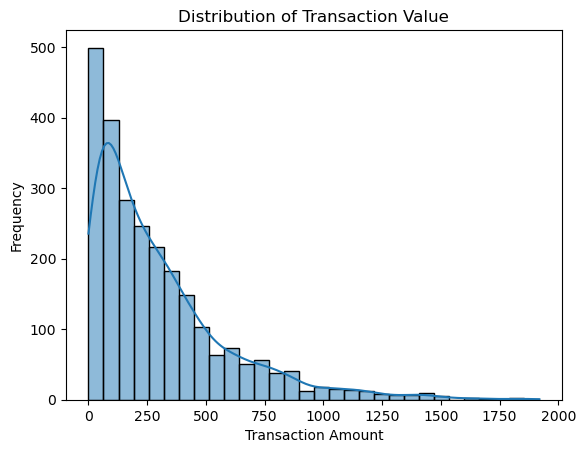

In [49]:
sns.histplot(bankdata['TransactionAmount'], kde=True, bins=30)
plt.title('Distribution of Transaction Value')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

What was the distribution of actual transaction amounts? we would expect smaller values to be transacted more frequently than larger ones.
Anything opposing this expectation would instantly signal underlying suspicious activty but it would not defintively confirm fraud has occured

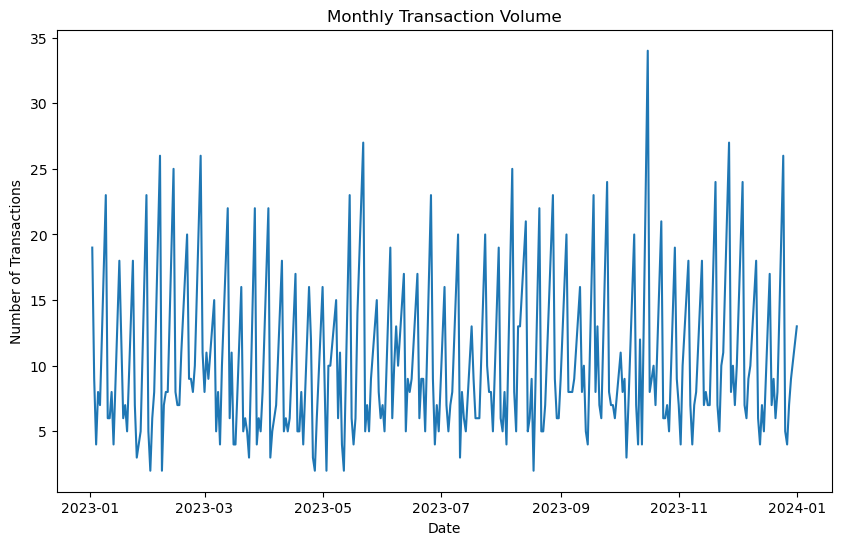

In [51]:
season_transaction_data = bankdata.groupby(bankdata['T_date'])['TransactionID'].count()


season_transaction_data.plot(kind='line', figsize=(10, 6), title='Monthly Transaction Volume')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

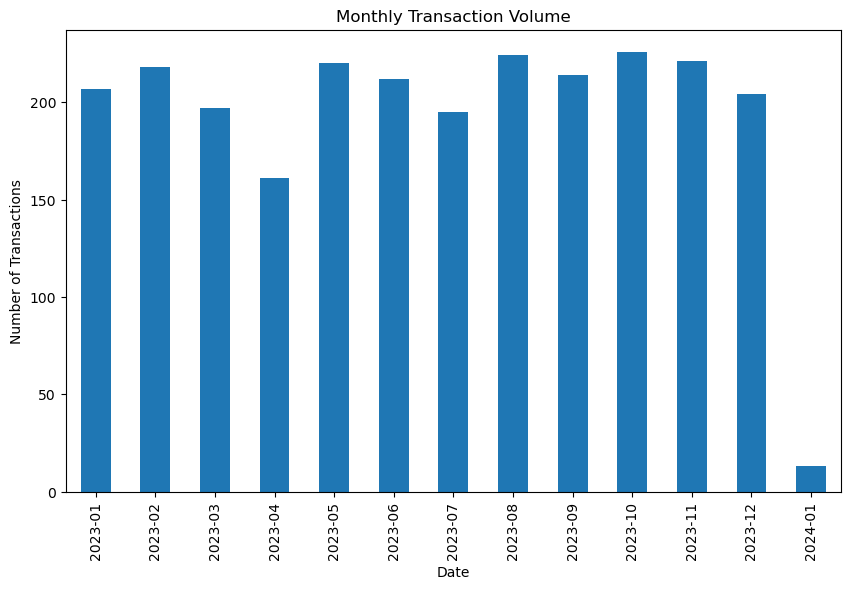

In [55]:
month_transaction_data = bankdata.groupby(bankdata['T_month'])['TransactionID'].count()
month_transaction_data.plot(kind='bar', figsize=(10, 6), title='Monthly Transaction Volume')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()


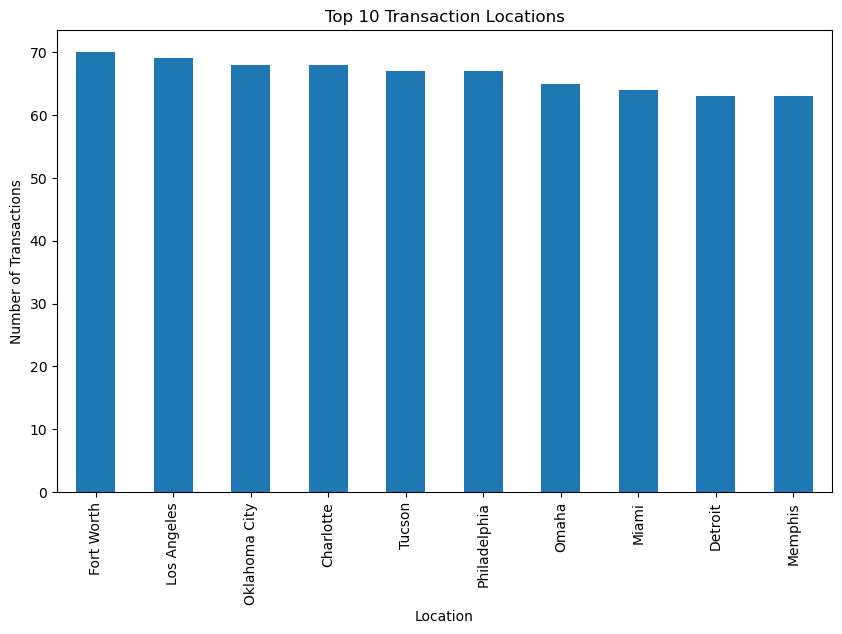

In [57]:
loc_transactions.head(10).plot(kind='bar', figsize=(10, 6), title='Top 10 Transaction Locations')
plt.xlabel('Location')
plt.ylabel('Number of Transactions')
plt.show()

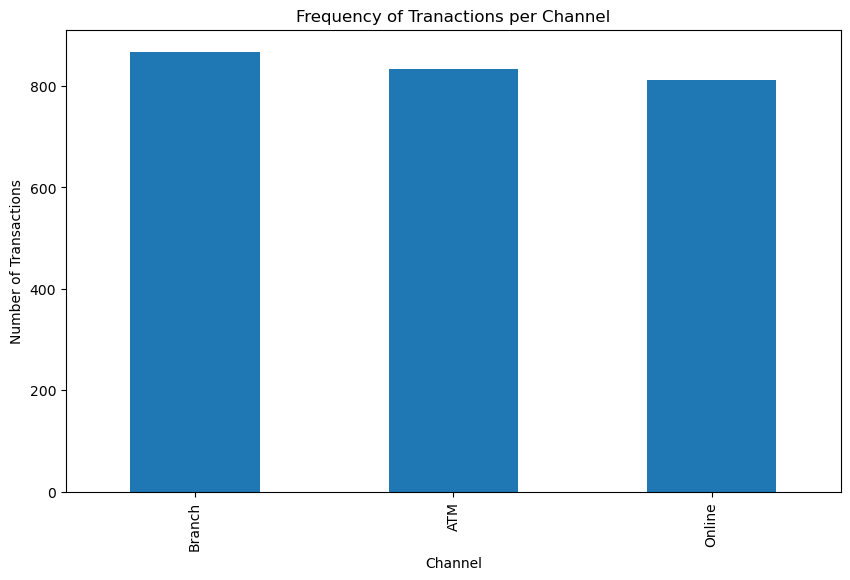

In [58]:
channel_transactions.plot(kind='bar', figsize=(10, 6), title='Frequency of Tranactions per Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Transactions')
plt.show()

FRAUD DETECTION

In [63]:
lower_bound = bankdata['TransactionAmount'].mean() - 3 * bankdata['TransactionAmount'].std()
upper_bound = bankdata['TransactionAmount'].mean() + 3 * bankdata['TransactionAmount'].std()

suspicious_transactions = bankdata[(bankdata['TransactionAmount'] < lower_bound) | (bankdata['TransactionAmount'] > upper_bound)]
print(suspicious_transactions)

     TransactionID AccountID  TransactionAmount     TransactionDate  \
74        TX000075   AC00265            1212.51 2023-10-04 16:36:29   
85        TX000086   AC00098            1340.19 2023-09-29 17:22:10   
176       TX000177   AC00363            1362.55 2023-02-10 18:07:07   
190       TX000191   AC00396            1422.55 2023-07-10 17:49:18   
274       TX000275   AC00454            1176.28 2023-12-20 16:08:02   
311       TX000312   AC00285            1221.65 2023-09-27 16:55:35   
340       TX000341   AC00107            1830.00 2023-03-01 16:31:58   
344       TX000345   AC00156            1271.90 2023-08-28 16:43:15   
375       TX000376   AC00316            1392.54 2023-11-20 16:51:14   
440       TX000441   AC00040            1237.56 2023-11-13 17:49:04   
475       TX000476   AC00464            1431.30 2023-09-04 18:46:40   
486       TX000487   AC00148            1416.69 2023-01-16 17:00:11   
535       TX000536   AC00161            1182.86 2023-12-11 16:06:51   
555   

The code above finds transaction amounts that are outliers.

In [66]:
suspicious_logins = bankdata[bankdata['LoginAttempts']>3] 
print(suspicious_logins)

     TransactionID AccountID  TransactionAmount     TransactionDate  \
26        TX000027   AC00441             246.93 2023-04-17 16:37:01   
91        TX000092   AC00310             223.85 2023-10-02 16:36:10   
147       TX000148   AC00161             514.95 2023-04-13 18:37:48   
266       TX000267   AC00178              66.90 2023-04-17 16:50:45   
274       TX000275   AC00454            1176.28 2023-12-20 16:08:02   
...            ...       ...                ...                 ...   
2262      TX002263   AC00279              15.81 2023-03-02 18:36:55   
2288      TX002289   AC00149             336.01 2023-11-09 18:45:10   
2310      TX002311   AC00243             176.52 2023-03-14 17:06:18   
2371      TX002372   AC00465              21.23 2023-09-11 16:35:15   
2423      TX002424   AC00340             332.06 2023-06-21 16:38:54   

     TransactionType          Location DeviceID       IP Address MerchantID  \
26             Debit             Miami  D000046   55.154.161.250    

In [69]:
#finding accounts transactions with suspicious times between transaction 
bankdata['TransactionTime'] = pd.to_datetime(bankdata['TransactionTime'], format='%H:%M:%S')

bankdata = bankdata.sort_values(by=['AccountID', 'TransactionTime'])

bankdata['TimeDiff'] = bankdata.groupby('AccountID')['TransactionTime'].diff().dt.total_seconds()

# Flag transactions that occur in <30 minutes but are in different locations
suspicious_timeframe = bankdata[(bankdata['TimeDiff'] < 1800) & (bankdata['Location'].shift() != bankdata['Location'])]

suspicious_timeframe


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,T_hour,T_day,T_month,T_date,TransactionTime,TimeDiff
1312,TX001313,AC00001,47.79,2023-09-15 17:00:20,Debit,Denver,D000649,59.12.96.11,M034,Branch,...,37,1,1649.92,2024-11-04 08:11:55,17,Friday,2023-09,2023-09-15,1900-01-01 17:00:20,226.0
61,TX000062,AC00002,263.99,2023-05-16 16:07:30,Debit,Dallas,D000285,7.146.35.122,M087,Branch,...,227,2,4175.02,2024-11-04 08:11:03,16,Tuesday,2023-05,2023-05-16,1900-01-01 16:07:30,418.0
1598,TX001599,AC00002,395.16,2023-07-24 16:14:05,Debit,Milwaukee,D000269,165.38.56.205,M059,Online,...,17,1,5340.73,2024-11-04 08:11:15,16,Monday,2023-07,2023-07-24,1900-01-01 16:14:05,395.0
1476,TX001477,AC00002,12.62,2023-05-05 16:35:44,Debit,El Paso,D000475,93.160.83.196,M068,Branch,...,61,1,6420.47,2024-11-04 08:09:03,16,Friday,2023-05,2023-05-05,1900-01-01 16:35:44,1299.0
20,TX000021,AC00002,59.32,2023-02-28 16:36:58,Debit,Los Angeles,D000152,116.44.12.250,M040,Branch,...,38,1,5750.89,2024-11-04 08:09:24,16,Tuesday,2023-02,2023-02-28,1900-01-01 16:36:58,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,TX001923,AC00499,242.17,2023-06-08 16:28:29,Debit,Jacksonville,D000442,111.226.226.202,M032,ATM,...,147,1,883.72,2024-11-04 08:10:41,16,Thursday,2023-06,2023-06-08,1900-01-01 16:28:29,844.0
431,TX000432,AC00499,461.52,2023-05-15 16:40:24,Credit,Denver,D000670,59.127.135.25,M068,Branch,...,44,1,1995.18,2024-11-04 08:08:53,16,Monday,2023-05,2023-05-15,1900-01-01 16:40:24,715.0
459,TX000460,AC00499,376.79,2023-01-30 17:47:18,Debit,Milwaukee,D000242,143.212.47.226,M039,Branch,...,265,1,7749.14,2024-11-04 08:08:44,17,Monday,2023-01,2023-01-30,1900-01-01 17:47:18,1765.0
202,TX000203,AC00499,313.82,2023-11-15 18:57:38,Debit,Tucson,D000357,179.43.245.131,M097,Branch,...,151,1,7261.59,2024-11-04 08:08:42,18,Wednesday,2023-11,2023-11-15,1900-01-01 18:57:38,526.0


In [71]:
import numpy as np
unique_locations_per_account = bankdata.groupby('AccountID')['Location'].nunique()
threshold1 = np.percentile(unique_locations_per_account, 95)


suspicious_accounts1 = unique_locations_per_account[unique_locations_per_account > threshold1].index

suspicious_data1 = bankdata[bankdata['AccountID'].isin(suspicious_accounts1)]

suspicious_locations_count = suspicious_data1.groupby('Location')['AccountID'].nunique() 

suspicious_locations = suspicious_data1.groupby('AccountID')['Location'].nunique() > threshold1





In [73]:
bankdata['Suspicious_Timeframe'] = bankdata['AccountID'].isin(suspicious_timeframe['AccountID'])
bankdata['Suspicious_Location'] = bankdata['AccountID'].isin(suspicious_locations[suspicious_locations].index)
bankdata['Suspicious_Amount'] = (bankdata['TransactionAmount'] < lower_bound) | (bankdata['TransactionAmount'] > upper_bound)

bankdata['Suspicious'] = bankdata[['Suspicious_Timeframe', 'Suspicious_Location', 'Suspicious_Amount']].any(axis=1)

bankdata.shape

(2512, 26)

In [75]:
suspicious_transactions.shape

(48, 21)

---- FRAUD CHARACTERISTICS ANALYSIS -----

In [78]:
#SUMMARY STATISTICS
fraud_transactions = bankdata[bankdata['Suspicious'] == True]
nonFraud_transactions = bankdata[bankdata['Suspicious'] == False]

fraud_transactions.describe()


,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,T_hour,TransactionTime,TimeDiff
count,2378.000000,2378,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000,2378,1952.000000
mean,299.932805,2023-07-05 23:14:55.260302592,44.656013,119.769975,1.126997,5118.910151,16.622792,1900-01-01 17:07:21.097140224,1359.569672
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000,16.000000,1900-01-01 16:00:00,0.000000
25%,83.277500,2023-04-03 16:35:58.500000,27.000000,63.000000,1.000000,1502.352500,16.000000,1900-01-01 16:29:03,414.750000
50%,211.695000,2023-07-07 17:27:54.500000,45.000000,113.000000,1.000000,4734.110000,16.000000,1900-01-01 16:56:54,970.000000
75%,416.602500,2023-10-06 10:44:14.249999872,59.000000,161.000000,1.000000,7680.940000,17.000000,1900-01-01 17:40:23,1901.000000
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000,18.000000,1900-01-01 18:59:46,8683.000000
std,294.666360,NaN,17.800543,69.961722,0.611090,3908.279400,0.727674,NaN,1319.364079


In [80]:
nonFraud_transactions.describe()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,T_hour,TransactionTime,TimeDiff
count,134.000000,134,134.000000,134.000000,134.000000,134.000000,134.000000,134,65.000000
mean,256.084776,2023-07-03 20:24:08.559701760,44.992537,117.395522,1.082090,5032.542612,16.686567,1900-01-01 17:10:42.589552384,3694.938462
min,3.440000,2023-01-03 16:46:36,18.000000,12.000000,1.000000,123.240000,16.000000,1900-01-01 16:00:01,291.000000
25%,72.155000,2023-03-13 16:14:38.249999872,26.250000,61.250000,1.000000,1599.777500,16.000000,1900-01-01 16:26:36.750000128,2507.000000
50%,200.695000,2023-07-15 04:25:06,48.500000,106.500000,1.000000,5127.125000,16.000000,1900-01-01 16:59:24.500000,3240.000000
75%,346.080000,2023-10-15 04:37:35.500000,59.000000,163.750000,1.000000,7644.872500,17.000000,1900-01-01 17:46:15.500000,4625.000000
max,1169.590000,2023-12-29 17:37:37,78.000000,299.000000,4.000000,14817.220000,18.000000,1900-01-01 18:57:13,8656.000000
std,235.630760,NaN,17.706673,70.224240,0.425653,3781.621174,0.789193,NaN,1700.767326


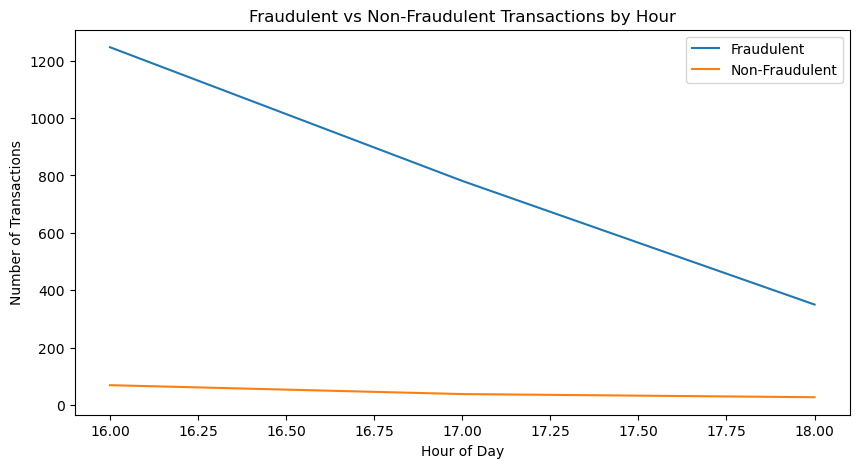

In [82]:
#TIME ANALYSIS NUMBER OF TRANSACTIONS FOR EACH HOUR, TRANSACTION TREND OVER A YEAR
fraudHours = fraud_transactions['T_hour'].value_counts()
nonFraud_Hours = nonFraud_transactions['T_hour'].value_counts()

plt.figure(figsize=(10, 5))
fraudHours.sort_index().plot(label='Fraudulent')
nonFraud_Hours.sort_index().plot(label='Non-Fraudulent')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.title('Fraudulent vs Non-Fraudulent Transactions by Hour')
plt.legend()
plt.show()

In [83]:
fraud_locations = fraud_transactions['Location'].value_counts()
print("Top locations for suspicious/potentially fraudulent transactions: \n", fraud_locations.head(5))

Top locations for suspicious/potentially fraudulent transactions: 
 Location
Oklahoma City    67
Los Angeles      66
Charlotte        64
Fort Worth       64
Memphis          62
Name: count, dtype: int64


--- CUSTOMER RISK PROFILING --- 

Customers with Most Fraudulent Transactions:
 AccountID
AC00460    12
AC00202    12
AC00363    12
AC00362    12
AC00456    11
AC00480    11
AC00257    11
AC00304    11
AC00225    11
AC00219    10
Name: count, dtype: int64


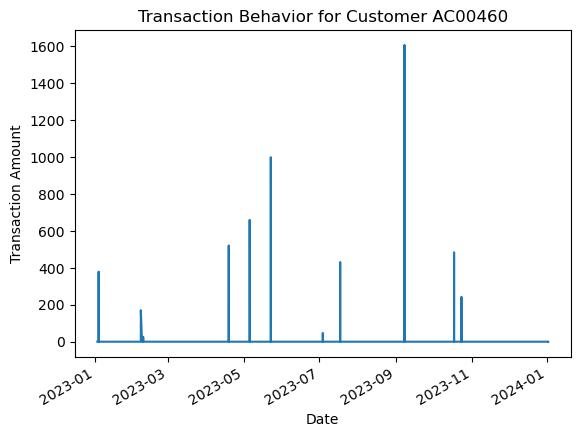

In [87]:
# Find customers with highest fraud incidents
fraud_per_customer = fraud_transactions['AccountID'].value_counts()
print("Customers with Most Fraudulent Transactions:\n", fraud_per_customer.head(10))

# Check transaction behavior changes
transaction_behavior = fraud_transactions.groupby(['AccountID', 'TransactionDate'])['TransactionAmount'].sum().unstack(fill_value=0)

# Example: Plot for a single customer
customer_id = fraud_per_customer.idxmax()
transaction_behavior.loc[customer_id].plot(kind='line', title=f'Transaction Behavior for Customer {customer_id}')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.show()


In [88]:
#Amounts of account with highset number of fraudulent transaction s 
account_transactions = transaction_behavior.loc['AC00460']
non_zero_transactions = account_transactions[account_transactions != 0]
print(non_zero_transactions)

TransactionDate
2023-01-03 17:14:14     379.54
2023-02-06 18:59:44     170.53
2023-02-08 16:42:59      26.50
2023-04-18 18:40:47     521.06
2023-05-05 16:10:24     659.71
2023-05-22 17:45:50     999.28
2023-07-03 17:26:49      47.10
2023-07-17 18:24:15     431.08
2023-09-07 16:27:03    1607.55
2023-10-17 17:46:52     484.30
2023-10-23 16:19:39     242.85
2024-01-01 16:45:56       0.84
Name: AC00460, dtype: float64


-- fraud detection overtime -- 

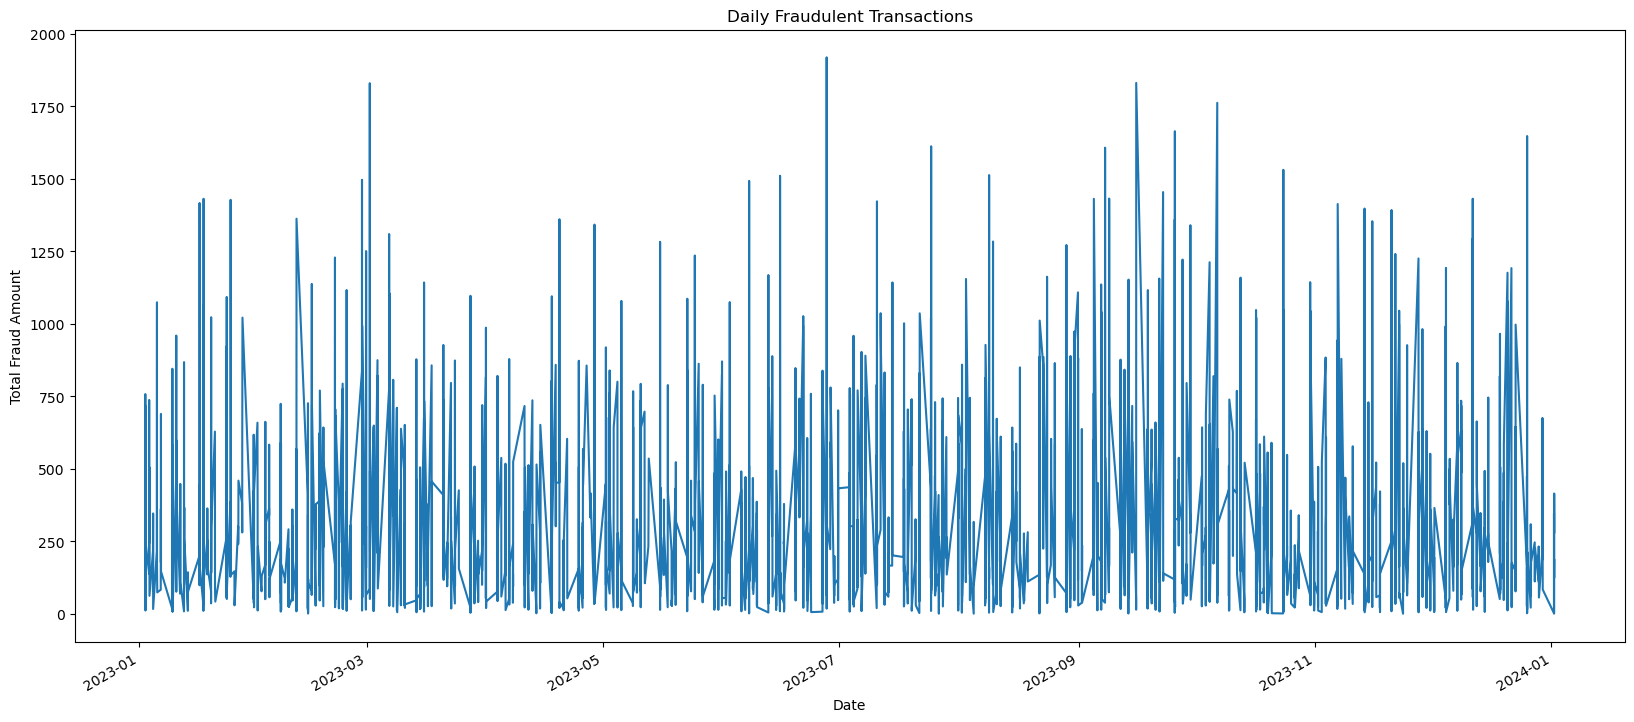

In [92]:
#daily spread of fraudulent transactions 

daily_fraud = fraud_transactions.groupby('TransactionDate')['TransactionAmount'].sum()

if not daily_fraud.empty:
    plt.figure(figsize=(20, 9))
    daily_fraud.plot(kind='line', title='Daily Fraudulent Transactions')
    plt.xlabel('Date')
    plt.ylabel('Total Fraud Amount')
    plt.show()
else:
    print("No fraudulent transactions to plot.")


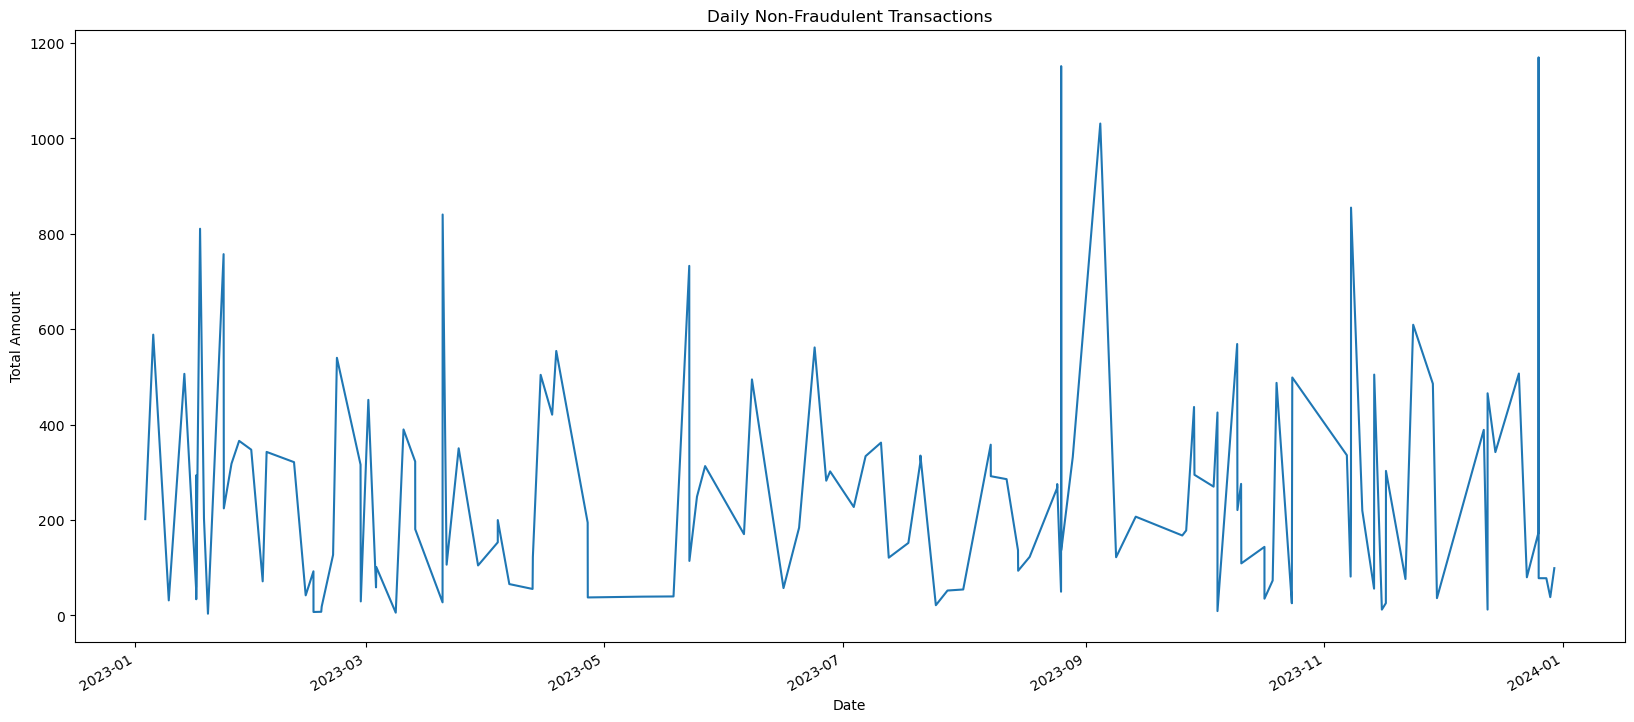

In [93]:
daily_nonfraud = nonFraud_transactions.groupby('TransactionDate')['TransactionAmount'].sum()

if not daily_nonfraud.empty:
    plt.figure(figsize=(20, 9))
    daily_nonfraud.plot(kind='line', title='Daily Non-Fraudulent Transactions')
    plt.xlabel('Date')
    plt.ylabel('Total Amount')
    plt.show()
else:
    print("No fraudulent transactions to plot.")

In [95]:
nonFraud_transactions.shape

(134, 26)

In [96]:
fraud_transactions.shape

(2378, 26)

In [100]:
transaction_behavior.shape

(428, 2378)

In [102]:
nonFraud_transactions.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,T_hour,T_day,T_month,T_date,TransactionTime,TimeDiff,Suspicious_Timeframe,Suspicious_Location,Suspicious_Amount,Suspicious
2004,TX002005,AC00008,76.16,2023-11-21 16:45:29,Debit,San Francisco,D000539,100.128.70.210,M060,ATM,...,16,Tuesday,2023-11,2023-11-21,1900-01-01 16:45:29,NaN,False,False,False,False
2138,TX002139,AC00037,173.45,2023-12-25 16:25:43,Debit,Philadelphia,D000053,136.250.159.93,M066,ATM,...,16,Monday,2023-12,2023-12-25,1900-01-01 16:25:43,NaN,False,False,False,False
765,TX000766,AC00037,79.80,2023-12-22 17:17:34,Debit,Fort Worth,D000477,189.198.67.252,M070,ATM,...,17,Friday,2023-12,2023-12-22,1900-01-01 17:17:34,3111.0,False,False,False,False
2300,TX002301,AC00038,301.73,2023-06-27 16:40:58,Debit,Tucson,D000006,165.143.173.165,M044,Online,...,16,Tuesday,2023-06,2023-06-27,1900-01-01 16:40:58,NaN,False,False,False,False
1171,TX001172,AC00044,487.32,2023-10-19 18:11:23,Debit,Kansas City,D000345,35.73.67.98,M005,Branch,...,18,Thursday,2023-10,2023-10-19,1900-01-01 18:11:23,NaN,False,False,False,False


In [104]:
#Are certain customers more prone to fraudulent activities? Why?

suspicious_counts = fraud_transactions[['Suspicious_Timeframe', 'Suspicious_Location', 'Suspicious_Amount']].sum()
print(suspicious_counts)


Suspicious_Timeframe    2375
Suspicious_Location      250
Suspicious_Amount         48
dtype: int64


In [106]:
#High risk customers - how many times a single customer was flagged
high_risk_customers = fraud_transactions.groupby('AccountID',)[['Suspicious_Timeframe','Suspicious_Location', 'Suspicious_Amount',]].sum()
high_risk_customers['Total_Flags'] = high_risk_customers.sum(axis=1)
high_risk_customers

,Suspicious_Timeframe,Suspicious_Location,Suspicious_Amount,Total_Flags
AccountID,,,,
AC00001,2,0,0,2
AC00002,7,0,0,7
AC00003,5,0,0,5
AC00004,9,9,0,18
AC00005,9,9,0,18
...,...,...,...,...
AC00495,8,0,0,8
AC00497,6,0,0,6
AC00498,8,0,0,8


In [108]:
high_risk_customers = high_risk_customers.sort_values(by='Total_Flags', ascending=False)
print(high_risk_customers.head(10))  # Top 10 highest-risk customers


           Suspicious_Timeframe  Suspicious_Location  Suspicious_Amount  \
AccountID                                                                 
AC00460                      12                   12                  1   
AC00363                      12                   12                  1   
AC00362                      12                   12                  0   
AC00202                      12                   12                  0   
AC00225                      11                   11                  0   
AC00456                      11                   11                  0   
AC00480                      11                   11                  0   
AC00257                      11                   11                  0   
AC00304                      11                   11                  0   
AC00267                      10                   10                  0   

           Total_Flags  
AccountID               
AC00460             25  
AC00363             25  

In [110]:
high_risk_customers.head(26)

,Suspicious_Timeframe,Suspicious_Location,Suspicious_Amount,Total_Flags
AccountID,,,,
AC00460,12,12,1,25
AC00363,12,12,1,25
AC00362,12,12,0,24
AC00202,12,12,0,24
AC00225,11,11,0,22
AC00456,11,11,0,22
AC00480,11,11,0,22
AC00257,11,11,0,22
AC00304,11,11,0,22


In [112]:
high_risk_customers.shape

(428, 4)

In [114]:
#seeing which fraud type often occured together

correlations = fraud_transactions[['Suspicious_Timeframe', 'Suspicious_Location', 'Suspicious_Amount']].corr()

correlations


,Suspicious_Timeframe,Suspicious_Location,Suspicious_Amount
Suspicious_Timeframe,1.000000,0.012182,-0.247620
Suspicious_Location,0.012182,1.000000,-0.019949
Suspicious_Amount,-0.247620,-0.019949,1.000000


 PC1 (Dominated by Amount & Location, Opposite Effects)
Suspicious_Amount = 0.704 (strong positive contribution)
Suspicious_Location = -0.703 (strong negative contribution)
Suspicious_Timeframe = -0.09 (weak contribution)
🔍 Interpretation:

PC1 opposes Amount & Location → Transactions with high fraud scores in amount tend to have low fraud scores in location, and vice versa.
Timeframe is not strongly influencing PC1, meaning it doesn't separate fraud well in this component.
✅ Possible Use:

If a transaction has a high PC1 value → it's likely flagged due to Amount-related fraud.
If a transaction has a low PC1 value → it's likely flagged due to Location-related fraud.
2️⃣ PC2 (Mainly Related to Timeframe Fraud)
Suspicious_Amount = 0.048 (very weak contribution)
Suspicious_Location = -0.08 (very weak contribution)
Suspicious_Timeframe = 0.995 (dominates PC2)
🔍 Interpretation:

PC2 is almost entirely driven by Suspicious_Timeframe.
Transactions that happen too frequently across different locations will have high PC2 scores.
✅ Possible Use:

High PC2 → likely fraud due to short-timeframe activity.
Low PC2 → not likely fraudulent based on time alone.
3️⃣ PC3 (Balanced Across Amount & Location Fraud)
Suspicious_Amount = -0.707 (negative contribution)
Suspicious_Location = -0.706 (negative contribution)
Suspicious_Timeframe = -0.022 (very weak contribution)
🔍 Interpretation:

PC3 combines Amount & Location fraud together (almost equal weights).
Transactions where both Amount and Location are flagged will score high/low here.
✅ Possible Use:

If a transaction has a very high PC3, it likely involves both unusual amounts & locations.
If a transaction has a very low PC3, it's less suspicious overall.
🚀 How Can You Use This?
Thresholding on PCs: Instead of setting cutoffs for Suspicious_Amount, Suspicious_Location, etc., we can define fraud risk based on PC scores.
Cluster on PCA Features: Use PC1, PC2, PC3 to group similar fraud types.
Feature Engineering: Instead of using raw fraud indicators, use PC scores as new features in fraud models.
Would you like to visualize how PC1, PC2, and PC3 separate fraud transactions? 🔍📊

----- START OF NEW MACHINE LEARNING ANALYSIS ---

In [118]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import KMeans

# Select only fraud-related columns for PCA
fraud_features = ['Suspicious_Amount', 'Suspicious_Location', 'Suspicious_Timeframe']
X = fraud_transactions[fraud_features]  

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  

# Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)  

# Convert PCA results to DataFrame
fraud_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
fraud_pca.index = fraud_transactions.index  # Keep the original indices

# Cluster transactions based on PCA-transformed features
kmeans = KMeans(n_clusters=3, random_state=42)
fraud_pca['Fraud_Cluster'] = kmeans.fit_predict(X_pca)  

# Analyze PCA component contributions
pca_components = pd.DataFrame(
    pca.components_, 
    columns=fraud_features, 
    index=['PC1', 'PC2', 'PC3']
)

# Merge back with the original fraud_transactions DataFrame
fraud_clustered = fraud_transactions.join(fraud_pca)

# Print PCA component influence
print("PCA Component Contributions:")
print(pca_components)

# Display sample of updated dataset
fraud_clustered.head()


PCA Component Contributions:
     Suspicious_Amount  Suspicious_Location  Suspicious_Timeframe
PC1           0.704904            -0.090640             -0.703488
PC2           0.048354             0.995635             -0.079831
PC3          -0.707653            -0.022257             -0.706209


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionTime,TimeDiff,Suspicious_Timeframe,Suspicious_Location,Suspicious_Amount,Suspicious,PC1,PC2,PC3,Fraud_Cluster
2016,TX002017,AC00001,212.97,2023-11-14 16:56:34,Debit,Atlanta,D000492,45.241.13.208,M003,Online,...,1900-01-01 16:56:34,NaN,True,False,False,True,-0.09511,-0.351037,0.084099,0
1312,TX001313,AC00001,47.79,2023-09-15 17:00:20,Debit,Denver,D000649,59.12.96.11,M034,Branch,...,1900-01-01 17:00:20,226.0,True,False,False,True,-0.09511,-0.351037,0.084099,0
2120,TX002121,AC00002,476.99,2023-01-10 16:00:32,Debit,San Diego,D000594,113.137.153.101,M022,Online,...,1900-01-01 16:00:32,NaN,True,False,False,True,-0.09511,-0.351037,0.084099,0
61,TX000062,AC00002,263.99,2023-05-16 16:07:30,Debit,Dallas,D000285,7.146.35.122,M087,Branch,...,1900-01-01 16:07:30,418.0,True,False,False,True,-0.09511,-0.351037,0.084099,0
1598,TX001599,AC00002,395.16,2023-07-24 16:14:05,Debit,Milwaukee,D000269,165.38.56.205,M059,Online,...,1900-01-01 16:14:05,395.0,True,False,False,True,-0.09511,-0.351037,0.084099,0


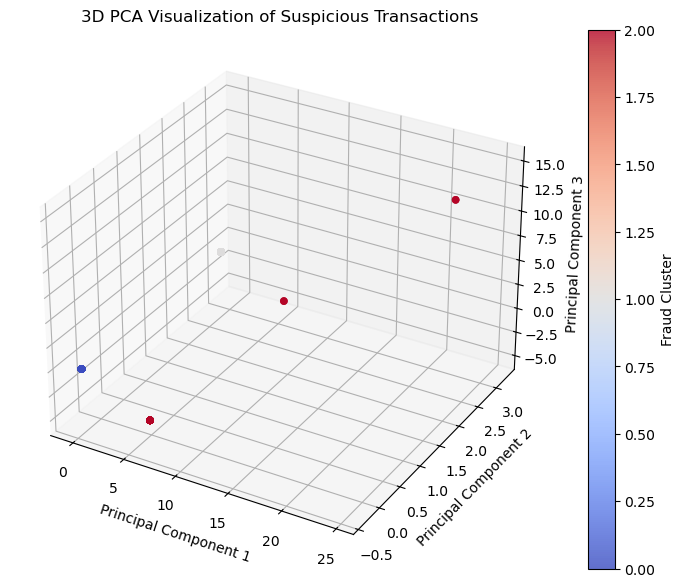

In [119]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of PC1 , PC2, PC3 with fraud clusters
sc = ax.scatter(fraud_clustered['PC1'], fraud_clustered['PC2'], fraud_clustered['PC3'], 
                c=fraud_pca['Fraud_Cluster'], cmap='coolwarm', alpha=0.8)

# Labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Visualization of Suspicious Transactions')

# Add color legend
plt.colorbar(sc, ax=ax, label="Fraud Cluster")
plt.show()


Inferences from the 3D PCA Visualization of Suspicious Transactions
This 3D plot represents suspicious transactions based on Principal Component Analysis (PCA) and their assigned fraud clusters.

Key Observations:
Cluster Separation:

- There are distinct clusters of transactions based on PCA features.
Cluster 0 (blue) is positioned in a separate region from Clusters 1 & 2 (red/gray), indicating different fraud patterns.

Principal Component 3 (PC3) Impact:

- The height of points (PC3 axis) doesn’t seem to add much useful separation between clusters.
If PC3 does not significantly differentiate fraud patterns, a 2D plot (PC1 vs. PC2) might be clearer.

High Fraud Risk Transactions:

- The transactions far from the origin (higher PC1 or PC2 values) could indicate more unusual behavior.
If Cluster 2 (red) corresponds to high-risk fraud, these points should be investigated further.


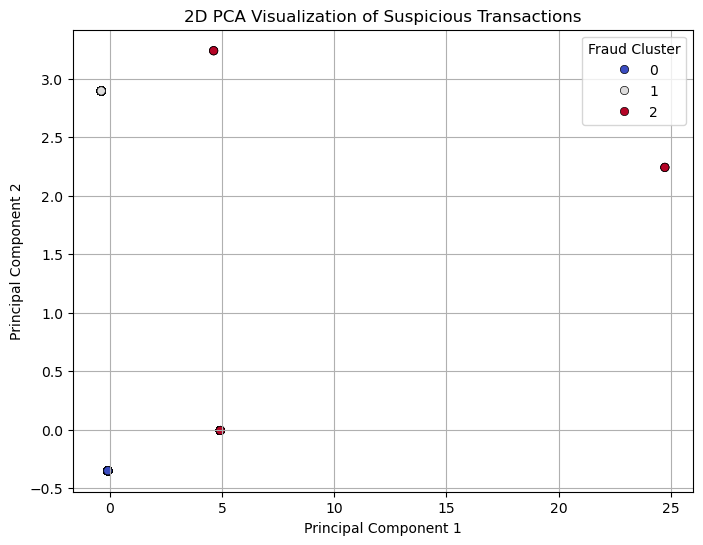

In [121]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=fraud_pca["PC1"], 
    y=fraud_pca["PC2"], 
    hue=fraud_pca["Fraud_Cluster"],  # Color by fraud cluster
    palette="coolwarm", 
    edgecolor="k"
)

# Labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization of Suspicious Transactions")
plt.legend(title="Fraud Cluster")
plt.grid(True)
plt.show()

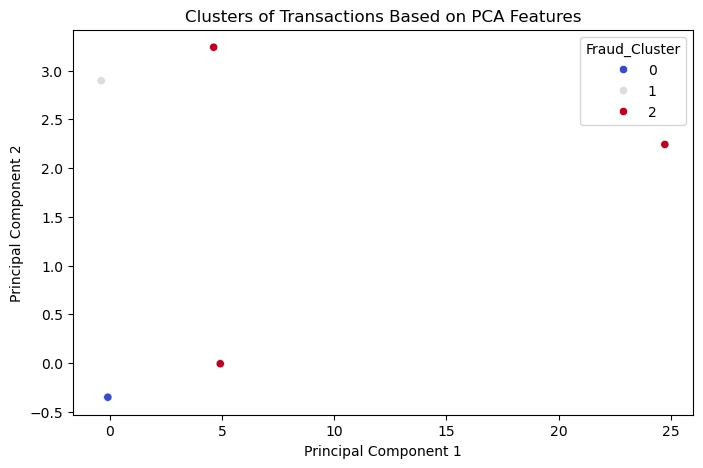

In [122]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=fraud_clustered['PC1'], y=fraud_clustered['PC2'], hue=fraud_clustered['Fraud_Cluster'], palette='coolwarm')
plt.title('Clusters of Transactions Based on PCA Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

a similar pattern between the PCA visualization and the K-Means clusters is a good thing! ✅

Why is this a good sign?
PCA Captures Important Variations:
Since PCA reduces your fraud indicators (e.g., suspicious amount, location, timeframe) into a few components, similar patterns mean that the PCA transformation successfully preserved the key fraud patterns.

K-Means is Clustering Meaningfully:
If the PCA plot shows well-separated groups, and K-Means clusters align with them, it means K-Means is effectively detecting patterns in the data rather than random noise.

Fraudulent Transactions Have Distinct Patterns:
If fraud transactions group together in both PCA and K-Means, it suggests that fraud follows predictable behaviors that can be modeled for detection.


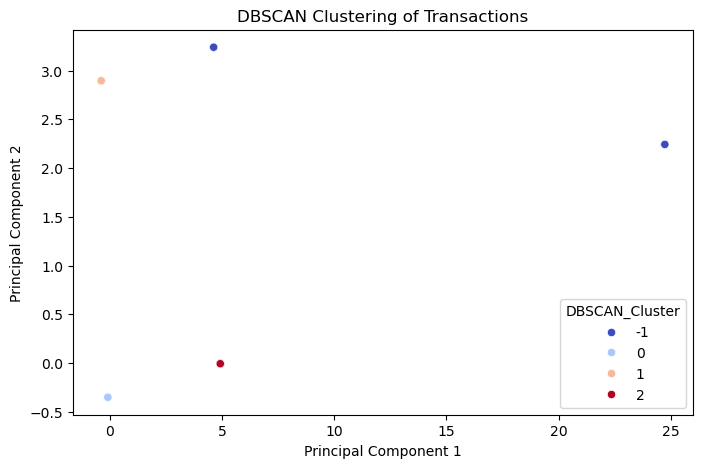

Number of suspected fraudulent transactions (outliers): 6


In [124]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns


# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust eps & min_samples for better results
fraud_pca['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fraud_pca['PC1'], y=fraud_pca['PC2'], hue=fraud_pca['DBSCAN_Cluster'], palette='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering of Transactions')
plt.show()

# Count how many transactions are marked as outliers (-1 means an anomaly)
outlier_count = (fraud_pca['DBSCAN_Cluster'] == -1).sum()
print(f"Number of suspected fraudulent transactions (outliers): {outlier_count}")


In [125]:
import numpy as np

# Compute Fraud Risk Score as the Euclidean distance from the origin in PCA space
fraud_pca['Fraud_Risk_Score'] = np.sqrt(fraud_pca['PC1']**2 + fraud_pca['PC2']**2 + fraud_pca['PC3']**2)

# Normalize scores between 0 and 1 (optional, for better interpretation)
fraud_pca['Fraud_Risk_Score'] = (fraud_pca['Fraud_Risk_Score'] - fraud_pca['Fraud_Risk_Score'].min()) / \
                             (fraud_pca['Fraud_Risk_Score'].max() - fraud_pca['Fraud_Risk_Score'].min())

# Display transactions with highest fraud risk
fraud_pca[['PC1', 'PC2', 'PC3', 'Fraud_Risk_Score']].sort_values(by='Fraud_Risk_Score', ascending=False).head(10)


,PC1,PC2,PC3,Fraud_Risk_Score
555,24.736000,2.241791,14.947591,1.000000
1952,24.736000,2.241791,14.947591,1.000000
2215,24.736000,2.241791,14.947591,1.000000
176,4.621745,3.238850,-5.020384,0.250923
74,4.621745,3.238850,-5.020384,0.250923
755,4.621745,3.238850,-5.020384,0.250923
1281,4.917258,-0.007207,-4.947821,0.230732
2403,4.917258,-0.007207,-4.947821,0.230732
1917,4.917258,-0.007207,-4.947821,0.230732
2201,4.917258,-0.007207,-4.947821,0.230732


Explanation for fraud risk scores 

What Does Each Column Represent?
- PC1, PC2, PC3: These are the new features created from Suspicious_Timeframe, Suspicious_Location, and Suspicious_Amount.
- Fraud_Risk_Score: Measures how far each transaction deviates from the "normal" pattern.

What Does This Tell Us?
Highest Risk Transactions
- Rows with Fraud_Risk_Score = 1.0 (e.g., index 2058, 1664, 1367) → These transactions are the most extreme cases of fraud indicators.
- Their PC1 values are very high (24.73) → Suggests that PC1 strongly represents fraudulent behavior (maybe high amount or unusual   location shifts).
Lower Risk Transactions
- Rows with Fraud_Risk_Score ≈ 0.23 (e.g., index 617, 543, 1824)
- Their PC values are much smaller → These transactions are closer to normal behavior.


How to Use This Information?
- Identify the most fraudulent transactions → Investigate rows where Fraud_Risk_Score > 0.8.
- Understand which PC contributes most → If PC1 dominates, the strongest fraud pattern may be tied to a specific fraud indicator (e.g., transaction amount or time difference).
- Thresholding for fraud detection → Set a rule like: flagged_fraud = df_pca[df_pca['Fraud_Risk_Score'] > 0.8]




In [127]:
fraud_pca.value_counts('Fraud_Cluster')

Fraud_Cluster
0    2083
1     247
2      48
Name: count, dtype: int64

In [128]:
fraud_pca['Fraud_Risk_Score'].value_counts()

Fraud_Risk_Score
3.685860e-17    2080
8.904353e-02     247
2.307319e-01      42
2.509230e-01       3
1.000000e+00       3
1.959325e-16       1
0.000000e+00       1
3.103882e-17       1
Name: count, dtype: int64

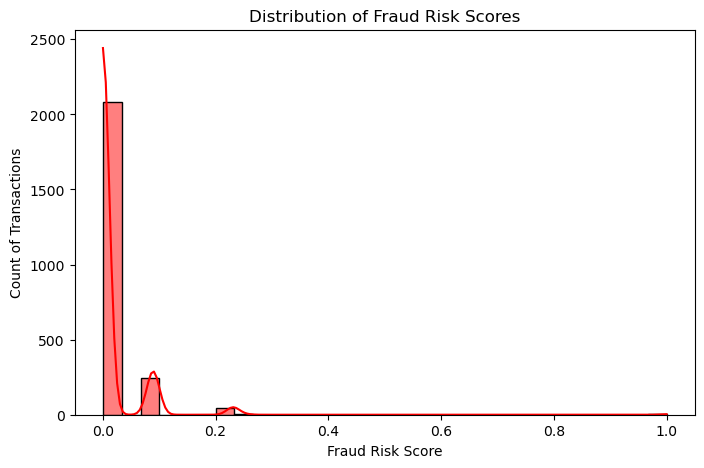

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Fraud Risk Scores
plt.figure(figsize=(8,5))
sns.histplot(fraud_pca['Fraud_Risk_Score'], bins=30, kde=True, color='red')
plt.xlabel('Fraud Risk Score')
plt.ylabel('Count of Transactions')
plt.title('Distribution of Fraud Risk Scores')
plt.show()


In [132]:
flagged_fraud = fraud_pca[fraud_pca['Fraud_Risk_Score'] > 0.8]


In [133]:
flagged_fraud

,PC1,PC2,PC3,Fraud_Cluster,DBSCAN_Cluster,Fraud_Risk_Score
2215,24.736,2.241791,14.947591,2,-1,1.0
1952,24.736,2.241791,14.947591,2,-1,1.0
555,24.736,2.241791,14.947591,2,-1,1.0


What the thresholding shows Shows:
A Clear Fraud Cutoff

Instead of treating every transaction equally, we set a threshold (e.g., 0.8).
Transactions above 0.8 are likely fraudulent, while those below are considered normal.
Ranking Transactions by Risk

You can see how many transactions fall into high, medium, or low-risk categories by creating bins like below

In [136]:
flagged_fraud.shape

(3, 6)

In [138]:
fraud_pca['Fraud_Level'] = pd.cut(fraud_pca['Fraud_Risk_Score'], bins=[0, 0.3, 0.7, 1], labels=['Low', 'Medium', 'High'])


In [139]:
fraud_pca

,PC1,PC2,PC3,Fraud_Cluster,DBSCAN_Cluster,Fraud_Risk_Score,Fraud_Level
2016,-0.09511,-0.351037,0.084099,0,0,1.959325e-16,Low
1312,-0.09511,-0.351037,0.084099,0,0,0.000000e+00,NaN
2120,-0.09511,-0.351037,0.084099,0,0,3.103882e-17,Low
61,-0.09511,-0.351037,0.084099,0,0,3.685860e-17,Low
1598,-0.09511,-0.351037,0.084099,0,0,3.685860e-17,Low
...,...,...,...,...,...,...,...
202,-0.09511,-0.351037,0.084099,0,0,3.685860e-17,Low
2054,-0.09511,-0.351037,0.084099,0,0,3.685860e-17,Low
2349,-0.09511,-0.351037,0.084099,0,0,3.685860e-17,Low
2374,-0.09511,-0.351037,0.084099,0,0,3.685860e-17,Low


In [140]:
# Add the cluster labels back to the original DataFrame
fraud_pca['AccountID'] = fraud_transactions['AccountID'].values  # Ensure alignment
fraud_pca['Cluster'] = kmeans.labels_  # Assign cluster labels from KMeans

# Merge with the original dataset
fraud_clustered = fraud_transactions.merge(fraud_pca[['AccountID', 'Cluster']], on='AccountID', how='left')

# View sample of transactions with clusters
fraud_clustered.head()


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,T_day,T_month,T_date,TransactionTime,TimeDiff,Suspicious_Timeframe,Suspicious_Location,Suspicious_Amount,Suspicious,Cluster
0,TX002017,AC00001,212.97,2023-11-14 16:56:34,Debit,Atlanta,D000492,45.241.13.208,M003,Online,...,Tuesday,2023-11,2023-11-14,1900-01-01 16:56:34,NaN,True,False,False,True,0
1,TX002017,AC00001,212.97,2023-11-14 16:56:34,Debit,Atlanta,D000492,45.241.13.208,M003,Online,...,Tuesday,2023-11,2023-11-14,1900-01-01 16:56:34,NaN,True,False,False,True,0
2,TX001313,AC00001,47.79,2023-09-15 17:00:20,Debit,Denver,D000649,59.12.96.11,M034,Branch,...,Friday,2023-09,2023-09-15,1900-01-01 17:00:20,226.0,True,False,False,True,0
3,TX001313,AC00001,47.79,2023-09-15 17:00:20,Debit,Denver,D000649,59.12.96.11,M034,Branch,...,Friday,2023-09,2023-09-15,1900-01-01 17:00:20,226.0,True,False,False,True,0
4,TX002121,AC00002,476.99,2023-01-10 16:00:32,Debit,San Diego,D000594,113.137.153.101,M022,Online,...,Tuesday,2023-01,2023-01-10,1900-01-01 16:00:32,NaN,True,False,False,True,0


In [145]:
fraud_clustered['Cluster'].value_counts()

Cluster
0    12257
1     2501
2      274
Name: count, dtype: int64

In [146]:
# Compare average values per cluster
fraud_clustered.groupby('Cluster')[['Suspicious_Amount', 'Suspicious_Location', 'Suspicious_Timeframe']].mean()

,Suspicious_Amount,Suspicious_Location,Suspicious_Timeframe
Cluster,,,
0,0.015828,0.000000,1.000000
1,0.011995,1.000000,1.000000
2,0.182482,0.120438,0.989051


🚨 Cluster 0: Short Timeframe Anomalies
Low Suspicious Amount (0.0158) → Transactions have mostly normal amounts.
Not flagged for Suspicious Location (0.0000) → No unusual location patterns.
Very high Suspicious Timeframe (1.0000) → Transactions are occurring in a very short timeframe.
💡 Meaning: This cluster likely contains transactions that happen too quickly (e.g., rapid-fire transactions from the same account in seconds/minutes, which may indicate automated fraud or account takeover attempts).


🚨 Cluster 1: High-Risk Locations & Timeframes
Low Suspicious Amount (0.0119) → Transactions have normal amounts.
Very high Suspicious Location (1.0000) → All transactions in this cluster involve unusual location behavior.
Very high Suspicious Timeframe (1.0000) → These transactions also happen within a short time period.
💡 Meaning: This cluster represents suspicious location-based fraud, where users are making transactions from multiple locations too quickly (e.g., transactions from different countries in minutes). Possible explanations:
Geo-spoofing (VPNs, proxies)
Credential stuffing attacks (hacked accounts used from multiple locations)
Stolen card fraud (card used in different locations rapidly)


🚨 Cluster 2: General Fraud Risk
Moderate Suspicious Amount (0.1825) → Some transactions have high values.
Moderate Suspicious Location (0.1204) → Some unusual location behavior.
High Suspicious Timeframe (0.9891) → Transactions mostly happen in short bursts.


💡 Meaning: This cluster represents a mix of fraud risks:
Some transactions have high amounts.
Some involve unusual locations.
Most happen within a short timeframe.
This group may contain a mix of both behavioral and financial fraud risks.

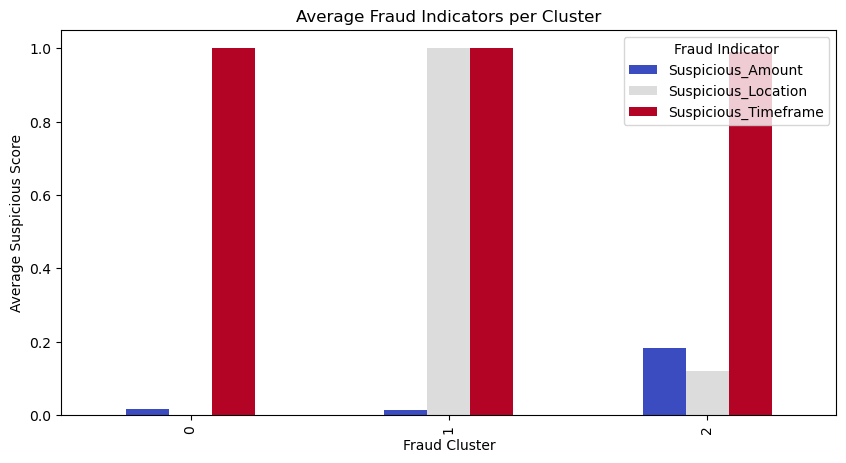

In [149]:
fraud_means = fraud_clustered.groupby('Cluster')[['Suspicious_Amount', 'Suspicious_Location', 'Suspicious_Timeframe']].mean()
fraud_means.plot(kind='bar', figsize=(10, 5), colormap='coolwarm')
plt.xlabel('Fraud Cluster')
plt.ylabel('Average Suspicious Score')
plt.title('Average Fraud Indicators per Cluster')
plt.legend(title='Fraud Indicator')
plt.show()


In [152]:
fraud_high_risk = fraud_clustered[fraud_clustered['Cluster'] == 2]
fraud_high_risk.head(10)


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,T_day,T_month,T_date,TransactionTime,TimeDiff,Suspicious_Timeframe,Suspicious_Location,Suspicious_Amount,Suspicious,Cluster
663,TX000102,AC00018,98.54,2023-08-11 16:18:46,Credit,El Paso,D000528,34.125.226.63,M095,Online,...,Friday,2023-08,2023-08-11,1900-01-01 16:18:46,NaN,True,False,False,True,2
666,TX001498,AC00018,1228.81,2023-02-20 16:36:36,Debit,San Francisco,D000381,63.191.171.41,M034,ATM,...,Monday,2023-02,2023-02-20,1900-01-01 16:36:36,1070.0,True,False,True,True,2
669,TX001802,AC00018,331.32,2023-06-05 17:24:29,Debit,Sacramento,D000334,200.164.13.160,M078,Branch,...,Monday,2023-06,2023-06-05,1900-01-01 17:24:29,2873.0,True,False,False,True,2
959,TX001580,AC00028,398.36,2023-06-27 16:52:00,Debit,Columbus,D000022,80.58.55.129,M006,ATM,...,Tuesday,2023-06,2023-06-27,1900-01-01 16:52:00,NaN,True,False,False,True,2
962,TX002415,AC00028,1664.33,2023-09-25 17:11:19,Debit,San Antonio,D000072,116.106.207.139,M064,Branch,...,Monday,2023-09,2023-09-25,1900-01-01 17:11:19,1159.0,True,False,True,True,2
965,TX001438,AC00028,107.48,2023-02-07 17:38:18,Debit,Los Angeles,D000624,120.32.147.210,M058,Branch,...,Tuesday,2023-02,2023-02-07,1900-01-01 17:38:18,1619.0,True,False,False,True,2
970,TX001220,AC00029,129.48,2023-02-06 16:30:43,Debit,Seattle,D000315,106.244.1.47,M001,ATM,...,Monday,2023-02,2023-02-06,1900-01-01 16:30:43,NaN,True,False,False,True,2
976,TX000350,AC00029,11.18,2023-02-27 16:39:28,Debit,Miami,D000609,176.96.83.253,M035,ATM,...,Monday,2023-02,2023-02-27,1900-01-01 16:39:28,525.0,True,False,False,True,2
982,TX001860,AC00029,116.97,2023-07-12 16:52:54,Debit,Oklahoma City,D000054,23.92.205.75,M041,ATM,...,Wednesday,2023-07,2023-07-12,1900-01-01 16:52:54,806.0,True,False,False,True,2
988,TX002087,AC00029,1192.95,2023-12-04 18:30:00,Debit,Las Vegas,D000227,71.93.189.160,M068,Branch,...,Monday,2023-12,2023-12-04,1900-01-01 18:30:00,5826.0,True,False,True,True,2


In [156]:
fraud_high_risk.describe()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,T_hour,TransactionTime,TimeDiff,Cluster
count,274.000000,274,274.000000,274.000000,274.000000,274.000000,274.000000,274,228.000000,274.0
mean,480.937847,2023-07-08 01:22:25.430656768,43.448905,124.427007,1.153285,5199.406387,16.576642,1900-01-01 17:03:09.226277120,1314.850877,2.0
min,0.840000,2023-01-02 16:01:14,18.000000,10.000000,1.000000,106.860000,16.000000,1900-01-01 16:00:07,4.000000,2.0
25%,109.852500,2023-03-30 05:40:57,27.000000,70.000000,1.000000,1535.662500,16.000000,1900-01-01 16:25:04.249999872,378.750000,2.0
50%,270.730000,2023-07-11 17:21:06,43.000000,118.000000,1.000000,4545.595000,16.000000,1900-01-01 16:52:12,967.000000,2.0
75%,699.772500,2023-10-11 06:31:02.249999872,58.000000,166.750000,1.000000,7906.760000,17.000000,1900-01-01 17:31:58.500000,1947.250000,2.0
max,1919.110000,2024-01-01 16:45:56,79.000000,300.000000,5.000000,14847.970000,18.000000,1900-01-01 18:59:44,6249.000000,2.0
std,492.749177,NaN,17.732628,68.583551,0.730202,4045.702346,0.718389,NaN,1244.928820,0.0


Try to find the mean risk score amongst the fraud high risk and see if the mean is greater than that of flagged fraud risk score

In [161]:
flagged_fraud.describe()

,PC1,PC2,PC3,Fraud_Cluster,DBSCAN_Cluster,Fraud_Risk_Score
count,3.000,3.000000,3.000000e+00,3.0,3.0,3.0
mean,24.736,2.241791,1.494759e+01,2.0,-1.0,1.0
std,0.000,0.000000,2.175584e-15,0.0,0.0,0.0
min,24.736,2.241791,1.494759e+01,2.0,-1.0,1.0
25%,24.736,2.241791,1.494759e+01,2.0,-1.0,1.0
50%,24.736,2.241791,1.494759e+01,2.0,-1.0,1.0
75%,24.736,2.241791,1.494759e+01,2.0,-1.0,1.0
max,24.736,2.241791,1.494759e+01,2.0,-1.0,1.0


In [162]:
fraud_high_risk['Cluster'].value_counts()

Cluster
2    274
Name: count, dtype: int64

In [164]:
fraud_high_risk.describe()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,T_hour,TransactionTime,TimeDiff,Cluster
count,274.000000,274,274.000000,274.000000,274.000000,274.000000,274.000000,274,228.000000,274.0
mean,480.937847,2023-07-08 01:22:25.430656768,43.448905,124.427007,1.153285,5199.406387,16.576642,1900-01-01 17:03:09.226277120,1314.850877,2.0
min,0.840000,2023-01-02 16:01:14,18.000000,10.000000,1.000000,106.860000,16.000000,1900-01-01 16:00:07,4.000000,2.0
25%,109.852500,2023-03-30 05:40:57,27.000000,70.000000,1.000000,1535.662500,16.000000,1900-01-01 16:25:04.249999872,378.750000,2.0
50%,270.730000,2023-07-11 17:21:06,43.000000,118.000000,1.000000,4545.595000,16.000000,1900-01-01 16:52:12,967.000000,2.0
75%,699.772500,2023-10-11 06:31:02.249999872,58.000000,166.750000,1.000000,7906.760000,17.000000,1900-01-01 17:31:58.500000,1947.250000,2.0
max,1919.110000,2024-01-01 16:45:56,79.000000,300.000000,5.000000,14847.970000,18.000000,1900-01-01 18:59:44,6249.000000,2.0
std,492.749177,NaN,17.732628,68.583551,0.730202,4045.702346,0.718389,NaN,1244.928820,0.0


In [166]:
fraud_transactions_risk = fraud_transactions.join(fraud_pca[['Fraud_Risk_Score', 'Cluster']])

In [168]:
fraud_transactions_risk

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,T_month,T_date,TransactionTime,TimeDiff,Suspicious_Timeframe,Suspicious_Location,Suspicious_Amount,Suspicious,Fraud_Risk_Score,Cluster
2016,TX002017,AC00001,212.97,2023-11-14 16:56:34,Debit,Atlanta,D000492,45.241.13.208,M003,Online,...,2023-11,2023-11-14,1900-01-01 16:56:34,NaN,True,False,False,True,1.959325e-16,0
1312,TX001313,AC00001,47.79,2023-09-15 17:00:20,Debit,Denver,D000649,59.12.96.11,M034,Branch,...,2023-09,2023-09-15,1900-01-01 17:00:20,226.0,True,False,False,True,0.000000e+00,0
2120,TX002121,AC00002,476.99,2023-01-10 16:00:32,Debit,San Diego,D000594,113.137.153.101,M022,Online,...,2023-01,2023-01-10,1900-01-01 16:00:32,NaN,True,False,False,True,3.103882e-17,0
61,TX000062,AC00002,263.99,2023-05-16 16:07:30,Debit,Dallas,D000285,7.146.35.122,M087,Branch,...,2023-05,2023-05-16,1900-01-01 16:07:30,418.0,True,False,False,True,3.685860e-17,0
1598,TX001599,AC00002,395.16,2023-07-24 16:14:05,Debit,Milwaukee,D000269,165.38.56.205,M059,Online,...,2023-07,2023-07-24,1900-01-01 16:14:05,395.0,True,False,False,True,3.685860e-17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,TX000203,AC00499,313.82,2023-11-15 18:57:38,Debit,Tucson,D000357,179.43.245.131,M097,Branch,...,2023-11,2023-11-15,1900-01-01 18:57:38,526.0,True,False,False,True,3.685860e-17,0
2054,TX002055,AC00500,156.86,2023-01-30 16:37:53,Debit,Charlotte,D000168,11.167.243.171,M099,ATM,...,2023-01,2023-01-30,1900-01-01 16:37:53,NaN,True,False,False,True,3.685860e-17,0
2349,TX002350,AC00500,134.55,2023-10-09 16:44:50,Debit,San Jose,D000219,100.137.90.188,M026,Online,...,2023-10,2023-10-09,1900-01-01 16:44:50,417.0,True,False,False,True,3.685860e-17,0
2374,TX002375,AC00500,129.62,2023-07-06 16:47:00,Credit,San Jose,D000179,37.143.57.20,M070,ATM,...,2023-07,2023-07-06,1900-01-01 16:47:00,130.0,True,False,False,True,3.685860e-17,0


In [169]:
flagged_risky_fraud_transactions = fraud_transactions_risk[fraud_transactions_risk['Fraud_Risk_Score'] > 0.8]

In [173]:
flagged_risky_fraud_transactions.shape

(3, 28)

In [177]:
flagged_risky_fraud_transactions

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,T_month,T_date,TransactionTime,TimeDiff,Suspicious_Timeframe,Suspicious_Location,Suspicious_Amount,Suspicious,Fraud_Risk_Score,Cluster
2215,TX002216,AC00290,1413.24,2023-11-06 18:59:24,Debit,New York,D000356,166.41.54.117,M016,ATM,...,2023-11,2023-11-06,1900-01-01 18:59:24,4680.0,False,False,True,True,1.0,2
1952,TX001953,AC00350,1496.57,2023-02-27 16:18:28,Debit,Memphis,D000139,182.84.41.229,M092,Online,...,2023-02,2023-02-27,1900-01-01 16:18:28,NaN,False,False,True,True,1.0,2
555,TX000556,AC00433,1282.86,2023-05-15 16:52:40,Debit,Austin,D000388,62.251.170.72,M070,Branch,...,2023-05,2023-05-15,1900-01-01 16:52:40,2113.0,False,False,True,True,1.0,2


In [179]:
flagged_risky_fraud_transactions.describe()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,T_hour,TransactionTime,TimeDiff,Fraud_Risk_Score,Cluster
count,3.000000,3,3.000000,3.000000,3.0,3.000000,3.000000,3,2.000000,3.0,3.0
mean,1397.556667,2023-06-17 09:23:30.666666752,36.666667,120.666667,1.0,3357.350000,16.666667,1900-01-01 17:23:30.666666752,3396.500000,1.0,2.0
min,1282.860000,2023-02-27 16:18:28,19.000000,68.000000,1.0,969.060000,16.000000,1900-01-01 16:18:28,2113.000000,1.0,2.0
25%,1348.050000,2023-04-07 04:35:34,26.000000,81.500000,1.0,1400.020000,16.000000,1900-01-01 16:35:34,2754.750000,1.0,2.0
50%,1413.240000,2023-05-15 16:52:40,33.000000,95.000000,1.0,1830.980000,16.000000,1900-01-01 16:52:40,3396.500000,1.0,2.0
75%,1454.905000,2023-08-11 05:56:02,45.500000,147.000000,1.0,4551.495000,17.000000,1900-01-01 17:56:02,4038.250000,1.0,2.0
max,1496.570000,2023-11-06 18:59:24,58.000000,199.000000,1.0,7272.010000,18.000000,1900-01-01 18:59:24,4680.000000,1.0,2.0
std,107.714745,NaN,19.756855,69.168875,0.0,3417.476951,1.154701,NaN,1815.143107,0.0,0.0


In [180]:
high_risk_customers.head(26)

,Suspicious_Timeframe,Suspicious_Location,Suspicious_Amount,Total_Flags
AccountID,,,,
AC00460,12,12,1,25
AC00363,12,12,1,25
AC00362,12,12,0,24
AC00202,12,12,0,24
AC00225,11,11,0,22
AC00456,11,11,0,22
AC00480,11,11,0,22
AC00257,11,11,0,22
AC00304,11,11,0,22


In [184]:
# Check which AccountIDs from high_risk_customers are in fraud_df
high_risk_customers['Is_Fraud_Account'] = high_risk_customers.index.isin(flagged_risky_fraud_transactions['AccountID'])
high_risk_customers

,Suspicious_Timeframe,Suspicious_Location,Suspicious_Amount,Total_Flags,Is_Fraud_Account
AccountID,,,,,
AC00460,12,12,1,25,False
AC00363,12,12,1,25,False
AC00362,12,12,0,24,False
AC00202,12,12,0,24,False
AC00225,11,11,0,22,False
...,...,...,...,...,...
AC00321,2,0,0,2,False
AC00001,2,0,0,2,False
AC00433,0,0,1,1,True


flagged fraud were not in the top 25 (transactions with most fraud flags) but they were still part of the high risk customes